In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

#### Reading Train and Test Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the dataset
train_df=pd.read_csv('/content/drive/My Drive/UNSW_Dataset/UNSW_NB15_training-set.csv')


In [5]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [6]:
train_df.shape

(175341, 45)

In [7]:
test_df=pd.read_csv('/content/drive/My Drive/UNSW_Dataset/UNSW_NB15_testing-set.csv')

In [8]:
test_df.shape

(82332, 45)

In [9]:
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [10]:
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


#### EDA for Train Dataset

In [11]:
#Checking data types of varaibles,missing value presence and no, of each data type
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [12]:
#Checking train data for presence of missing values
train_df.isnull().any().value_counts() 

False    45
dtype: int64

So train data is clean and does not contain missing values

In [13]:

#Calculating general statistics for the train data to get insights about the data
train_df.describe(percentiles=[0.01,0.05,0.1,0.2,0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,1%,5%,10%,20%,25%,50%,75%,90%,95%,99%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,1754.400,8768.000000,17535.000000,35069.000000,43836.000000,87671.000000,1.315060e+05,1.578070e+05,1.665740e+05,1.735876e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000,0.000003,0.000003,0.000006,0.000008,0.001582,6.680690e-01,1.510076e+00,3.079511e+00,4.535333e+01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,1.000,2.000000,2.000000,2.000000,2.000000,2.000000,1.200000e+01,4.800000e+01,6.400000e+01,2.340000e+02,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000e+01,3.800000e+01,6.200000e+01,4.000000e+02,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,46.000,114.000000,114.000000,114.000000,114.000000,430.000000,1.418000e+03,4.190000e+03,1.366200e+04,7.412540e+04,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000,0.000000,0.000000,0.000000,0.000000,164.000000,1.102000e+03,1.016800e+04,3.907600e+04,4.743678e+05,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,0.000,7.367939,15.513455,26.667265,32.786140,3225.806520,1.250000e+05,2.500000e+05,3.333333e+05,1.000000e+06,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,0.000,31.000000,31.000000,31.000000,62.000000,254.000000,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000,0.000000,0.000000,0.000000,0.000000,29.000000,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,0.000,2358.739014,4610.685059,9611.581055,13053.338870,879674.750000,8.888889e+07,1.600000e+08,2.666667e+08,8.000000e+08,5.988000e+09


### EDA for Test Dataset

In [14]:
#Checking Total observatons,presence of missing values, data types of each feature and total no of feature of each type
#of test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [15]:
#Checking test data for presence of missing values
test_df.isnull().any().value_counts() 

False    45
dtype: int64


So train data is clean and does not contain missing values

In [16]:
#Checking genral stats of test data variables whose dta type is object
test_df.describe(include='object').T.head()

,count,unique,top,freq
proto,82332,131,tcp,43095
service,82332,13,-,47153
state,82332,7,FIN,39339
attack_cat,82332,10,Normal,37000


From  stastical report we observed that variable num_outbounds is a binanry variable and its min value as well as max value are both 0.So it may be redundant

In [17]:
# Attack Class Distribution
train_df['attack_cat'].value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

###### Our task is to build network anomaly detection system using analytical approaches and machine learning models to detect anamolies and attacks in the network.  

 Using Binomial Classification: Identification of Activity is normal or attack 



# 1.Binomial Classification:  Activity is normal or attack

For this we have to create the dependent variable incorporating categories as Normal or attack

In [18]:
#This is a list of which incorporates all types of attacks.
attack_type=['Generic','Exploits','Fuzzers','DoS','Reconnaissance','Analysis','Backdoor','Shellcode','Worms']

In [19]:
#This is brief look of the train data with binomial depenmdent variable
train_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [20]:
#This is brief look of the test data with binomial depenmdent variable
test_df.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [21]:
#Categorical distribution of attack varable i.e dependent variable in train data
train_df['label'].value_counts()


1    119341
0     56000
Name: label, dtype: int64

In [22]:
#Categorical distribution of attack varable i.e dependent variable in test data
test_df['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [23]:
# Seperating categorical and numerical variable in train dtaset 
cat_list=train_df.select_dtypes(include='object').columns.tolist()
num_list=train_df.select_dtypes(include=np.number).columns.tolist()

### Graphical EDA 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


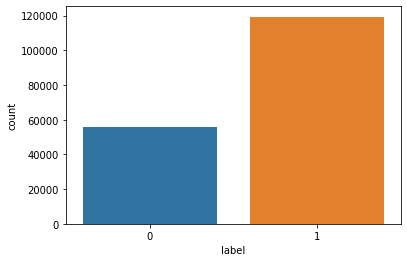

In [ ]:
#Bar graph of attack variable in train ddata where 0 signifies normal and 1 signifies attack
sns.countplot(train_df['label'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

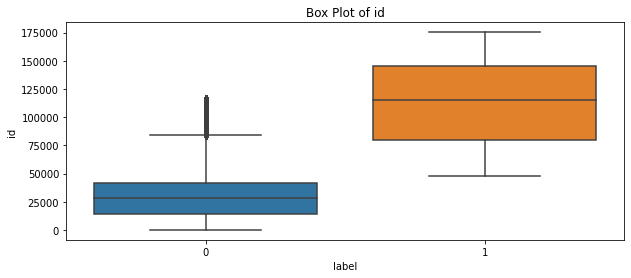

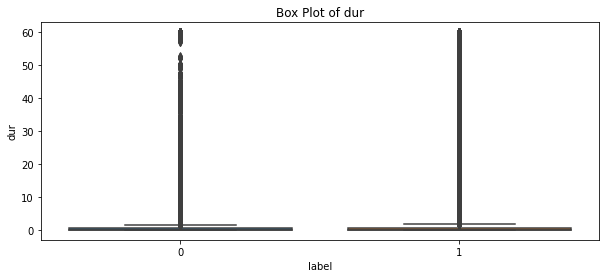

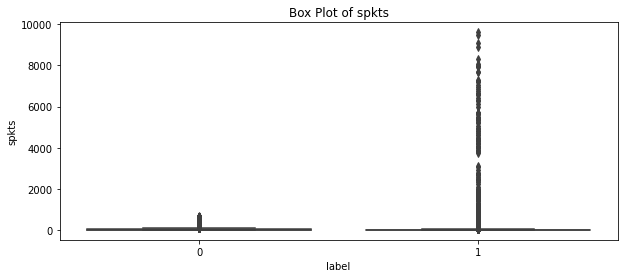

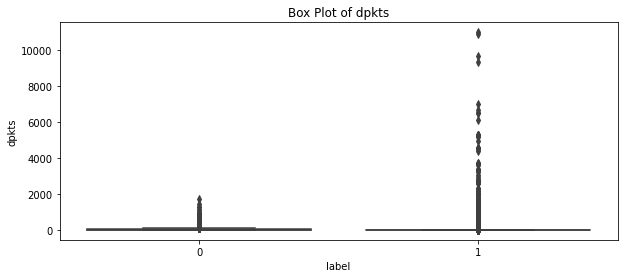

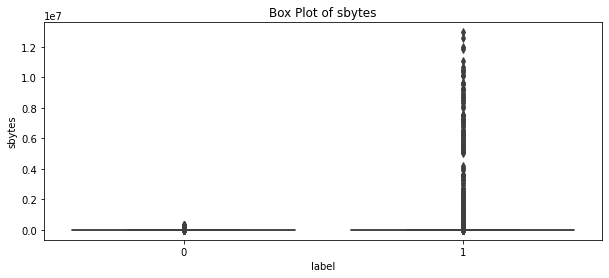

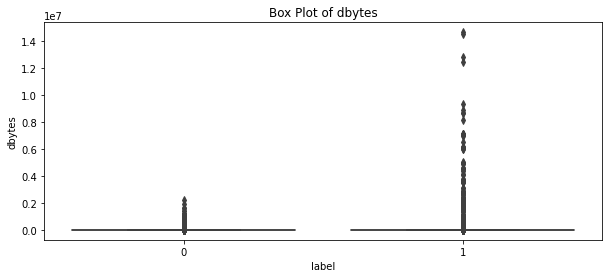

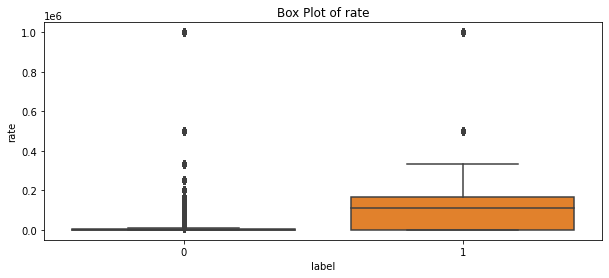

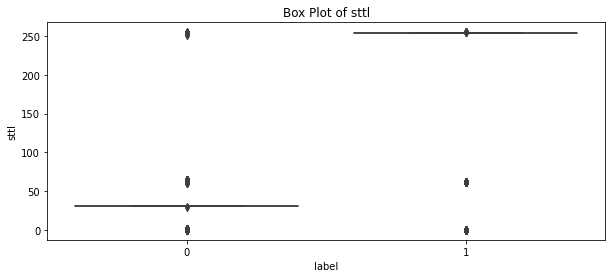

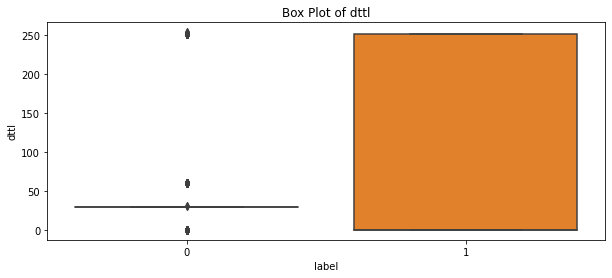

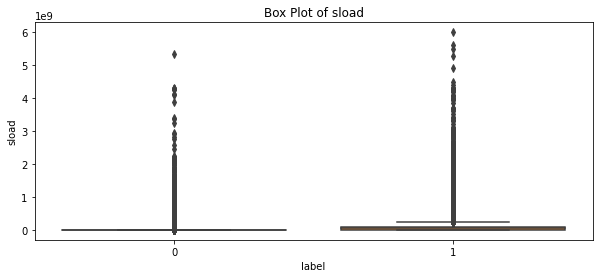

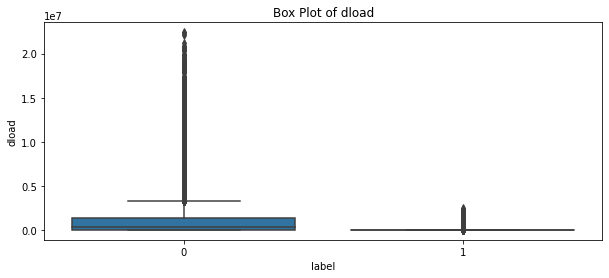

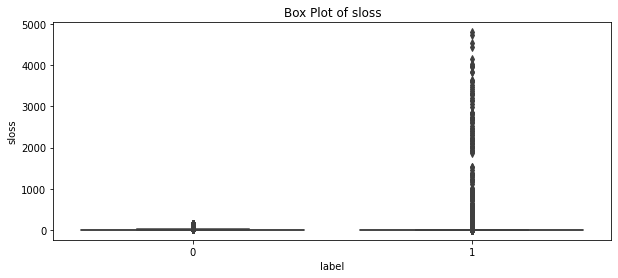

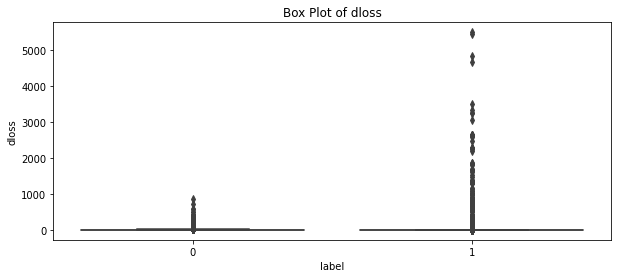

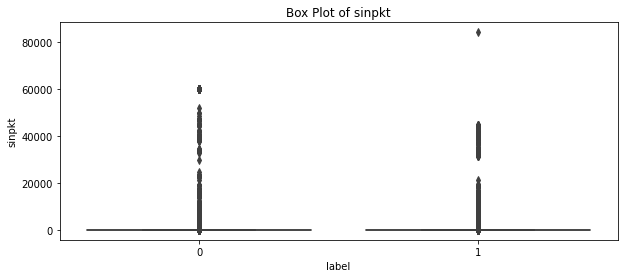

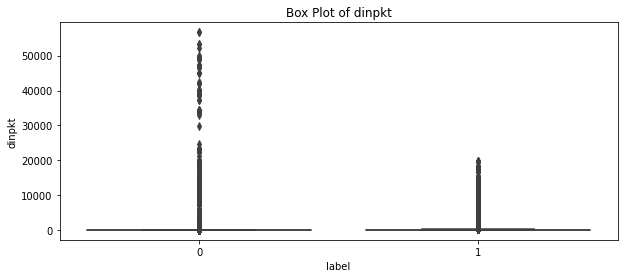

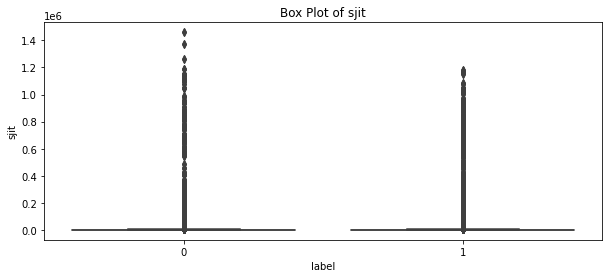

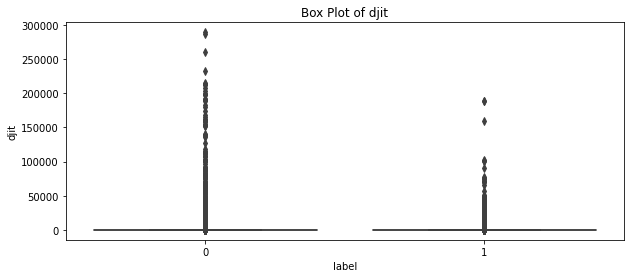

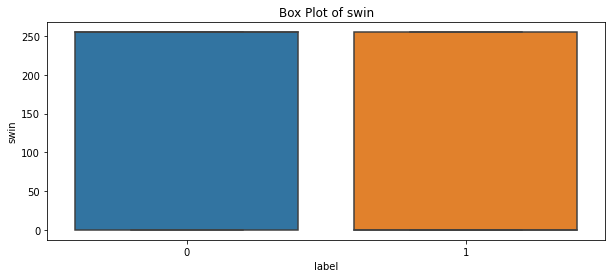

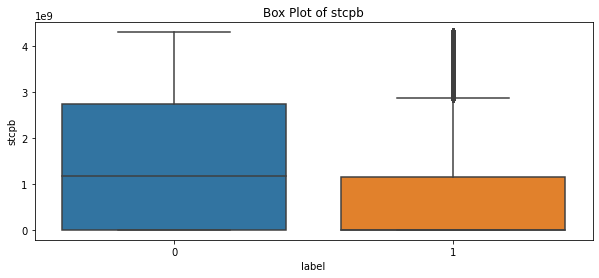

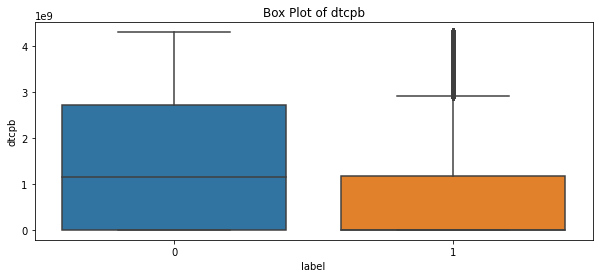

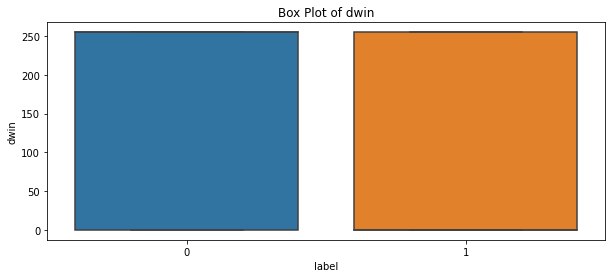

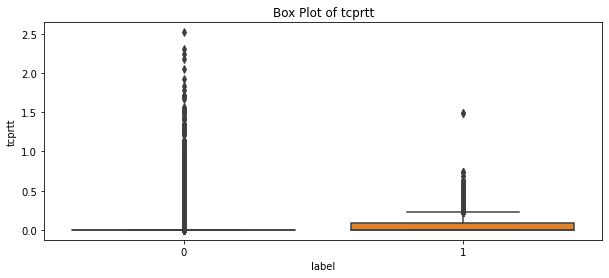

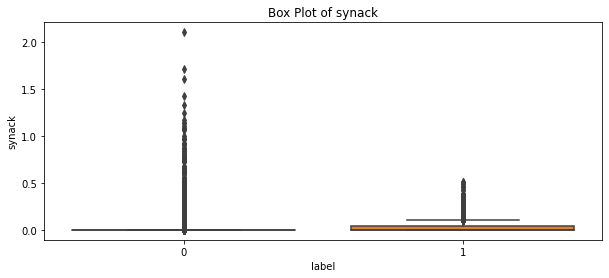

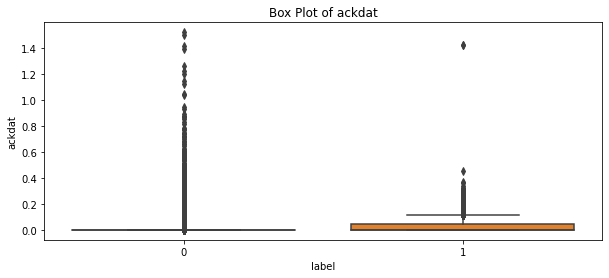

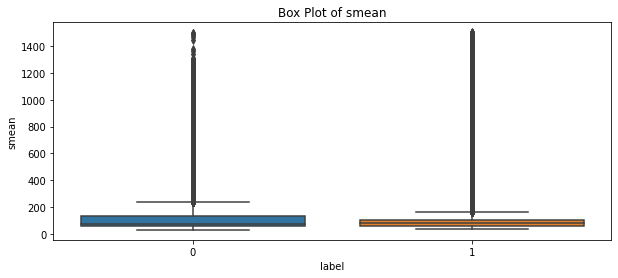

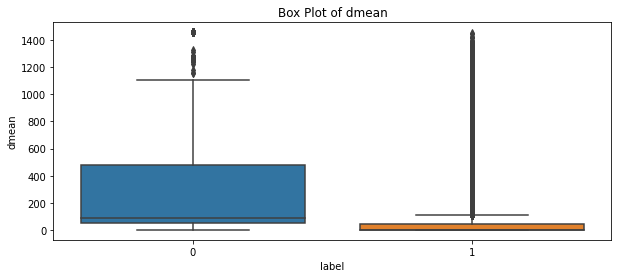

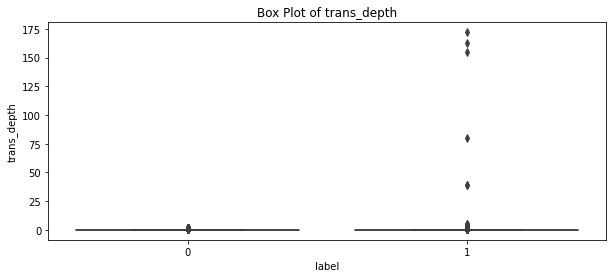

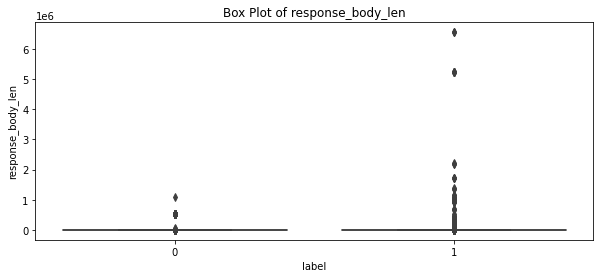

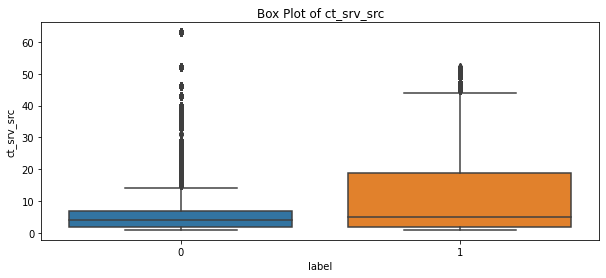

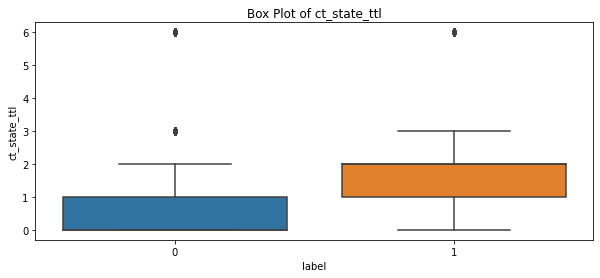

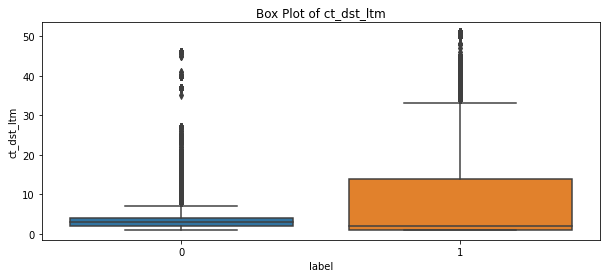

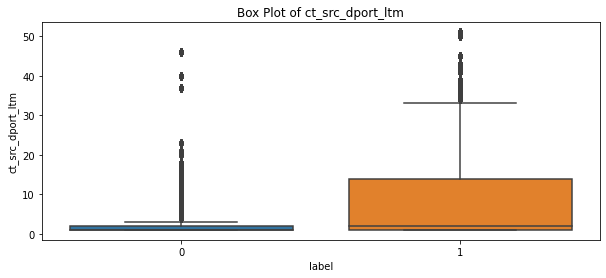

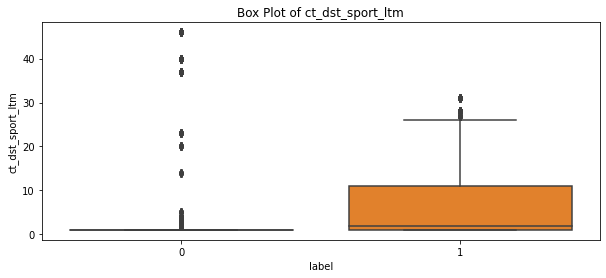

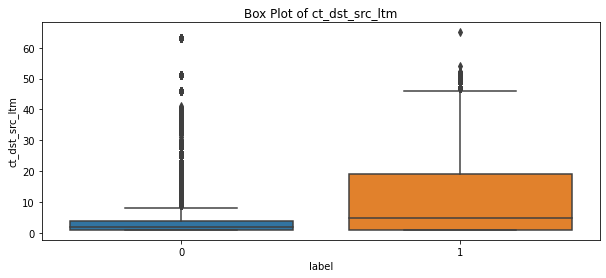

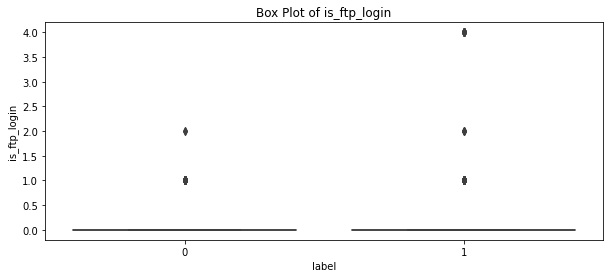

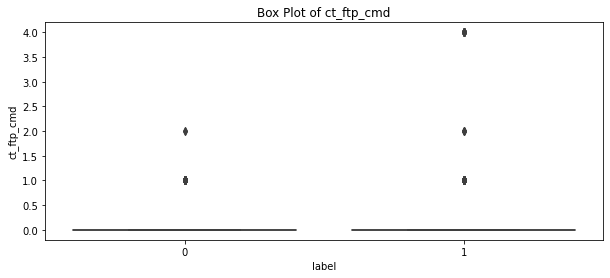

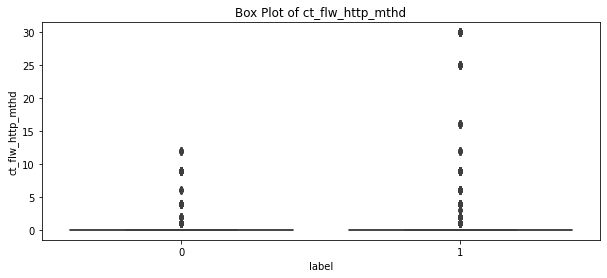

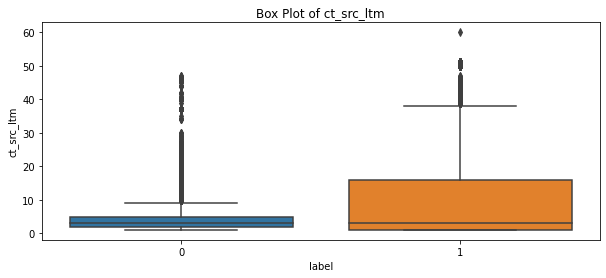

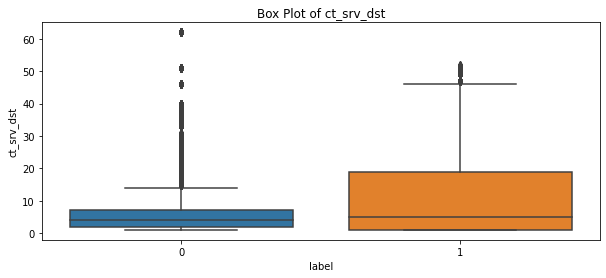

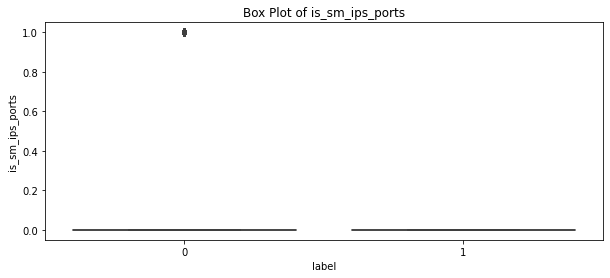

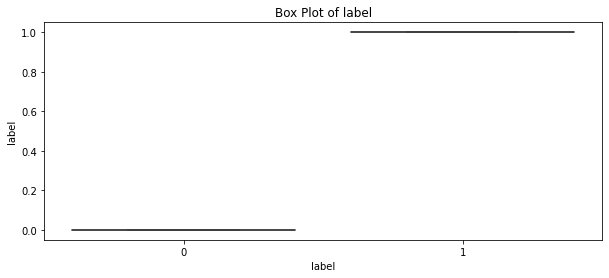

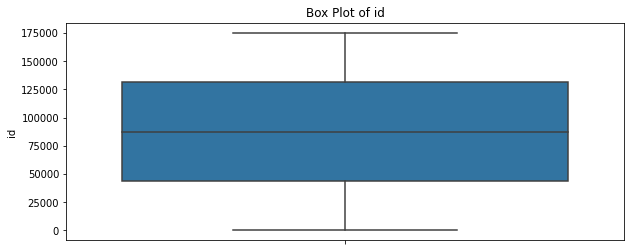

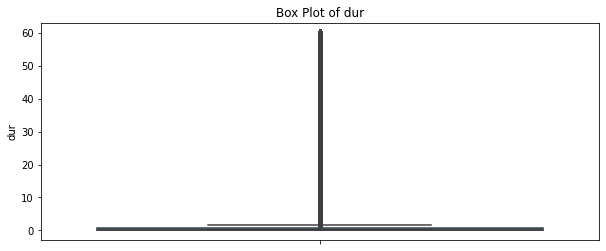

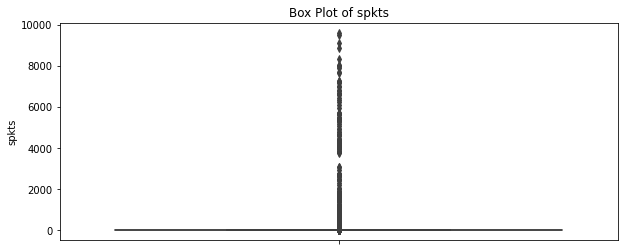

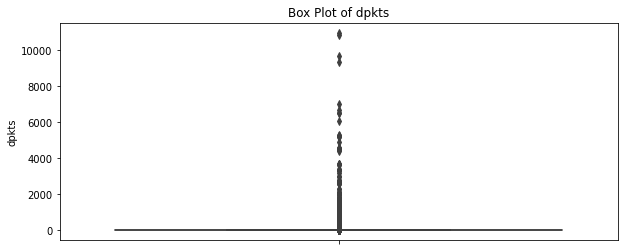

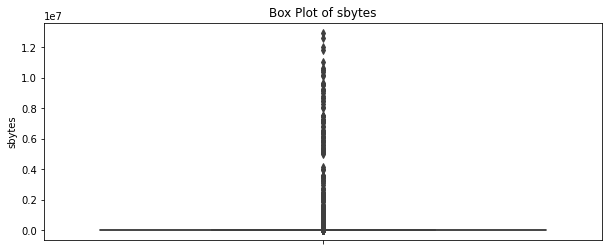

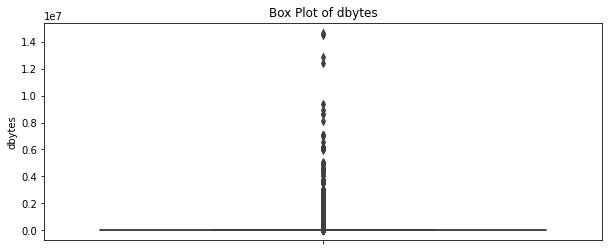

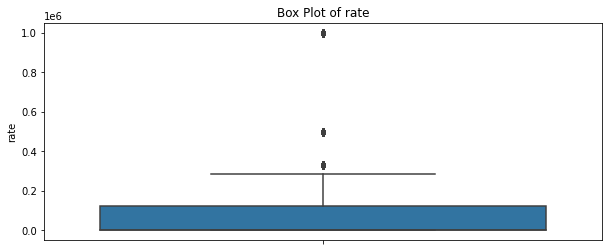

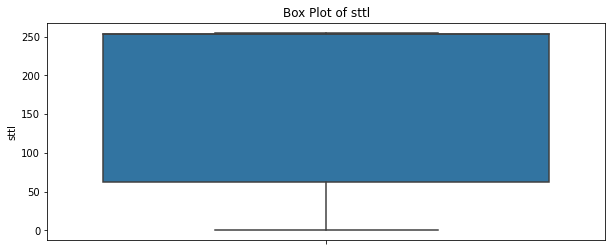

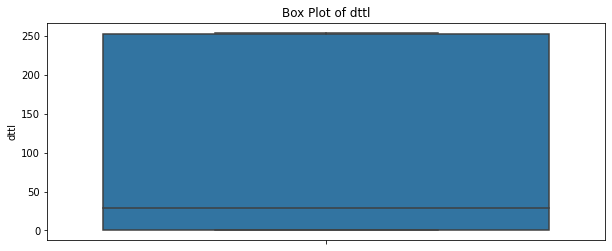

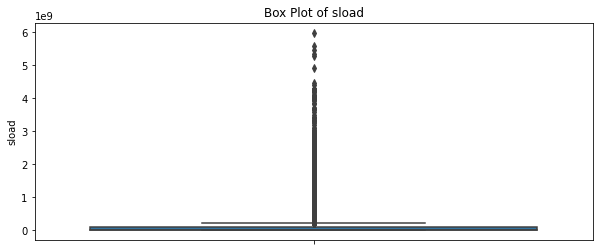

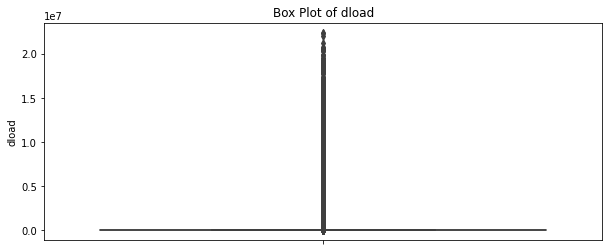

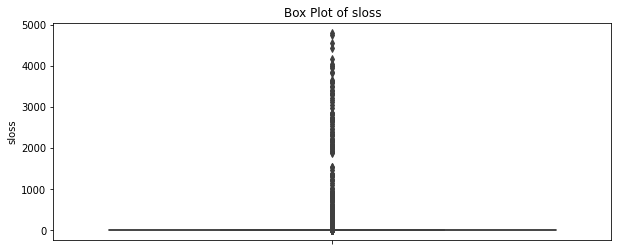

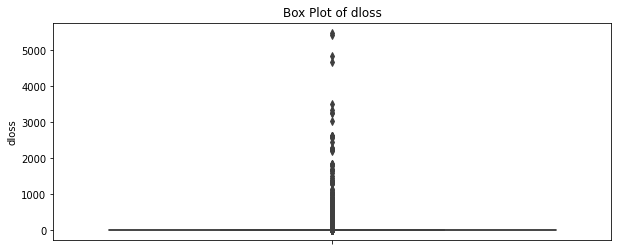

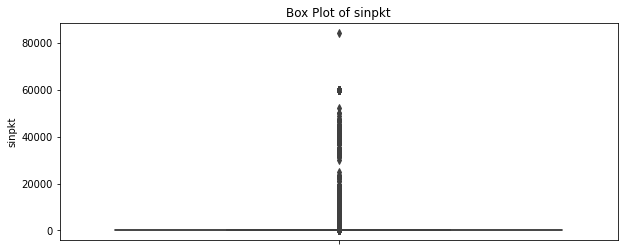

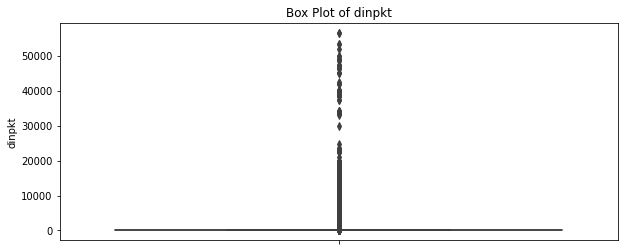

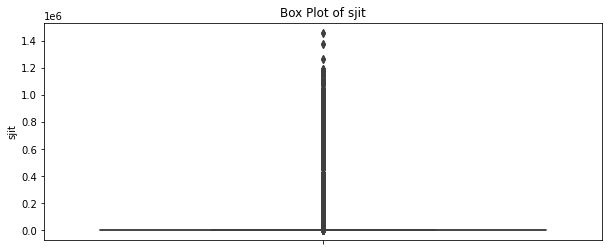

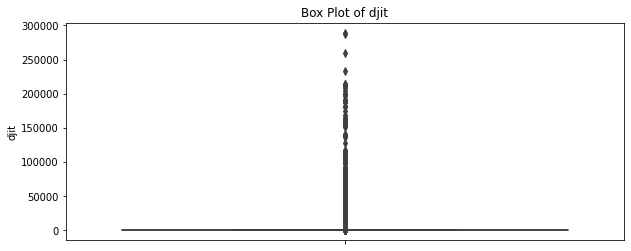

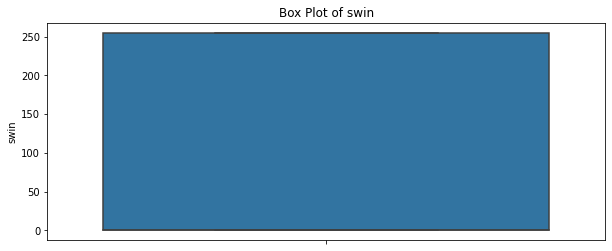

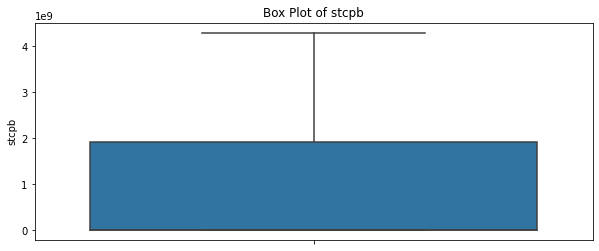

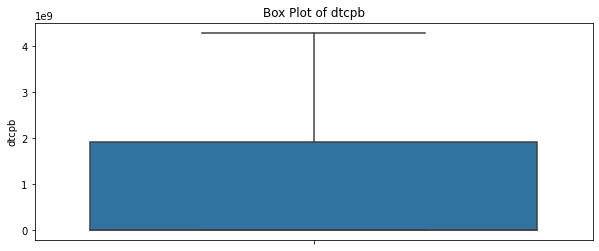

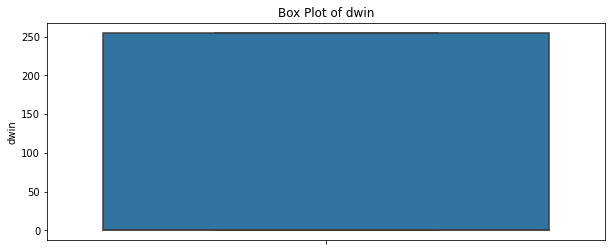

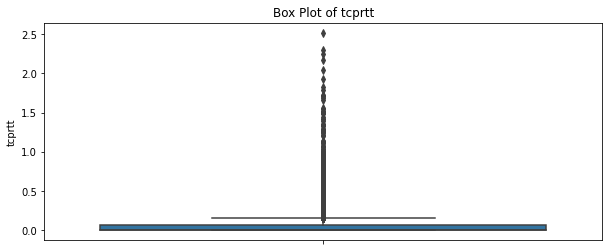

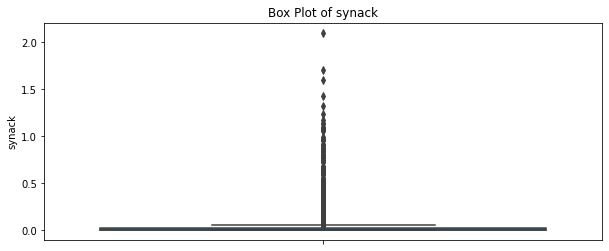

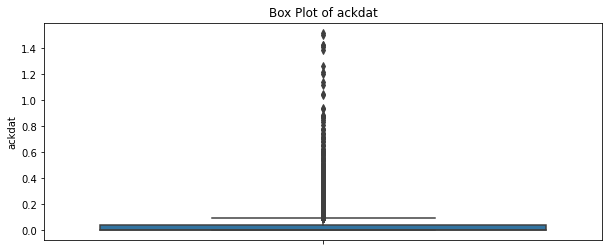

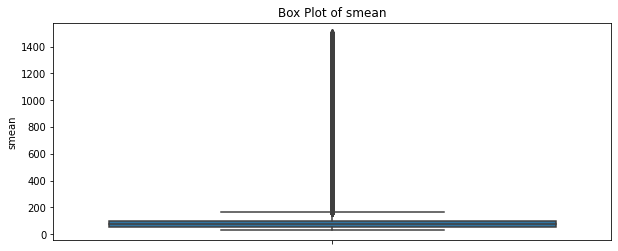

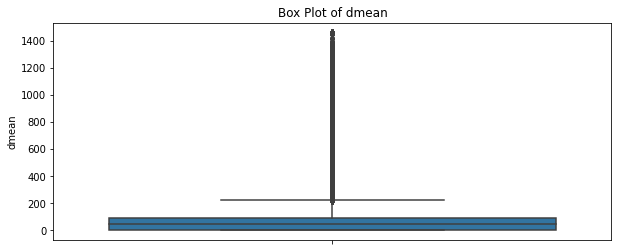

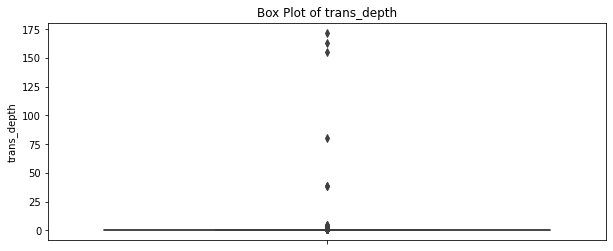

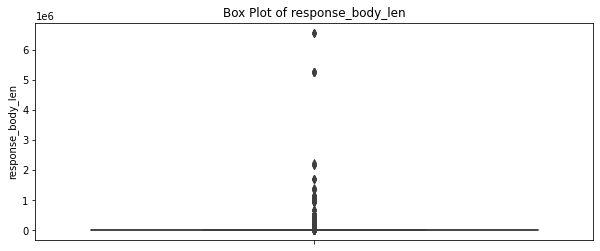

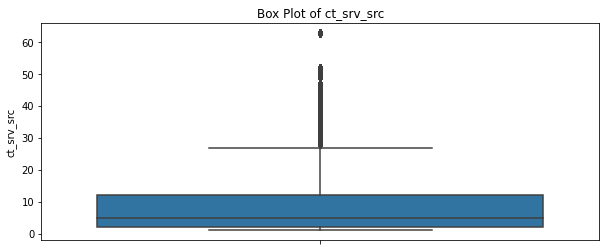

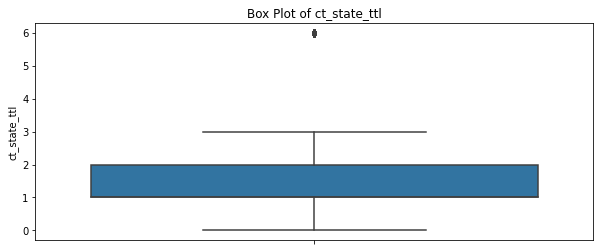

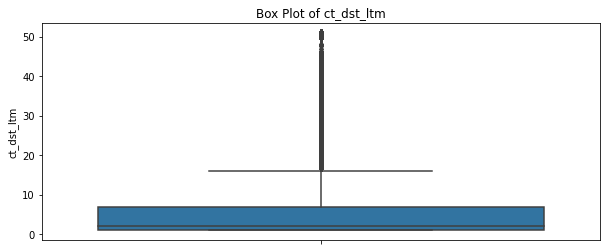

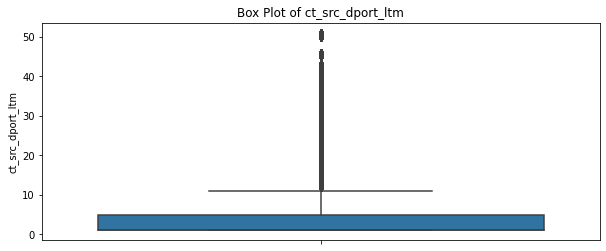

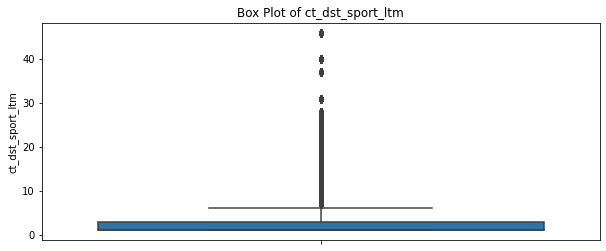

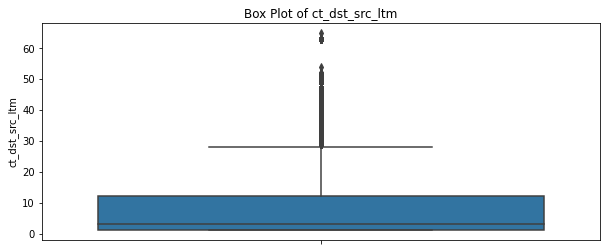

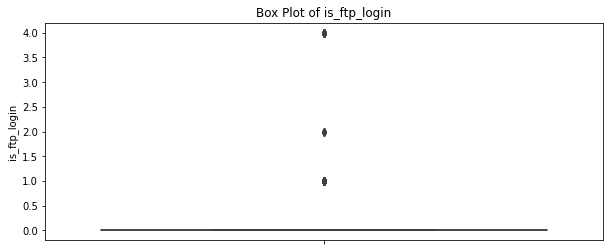

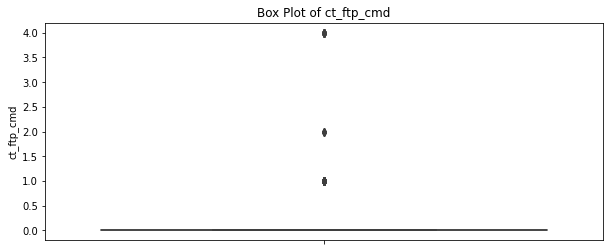

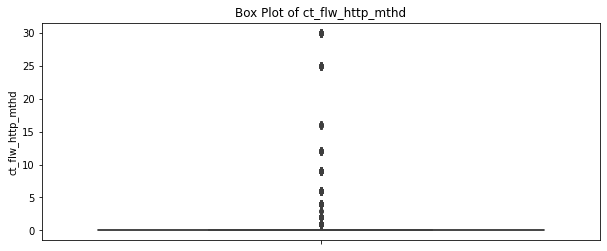

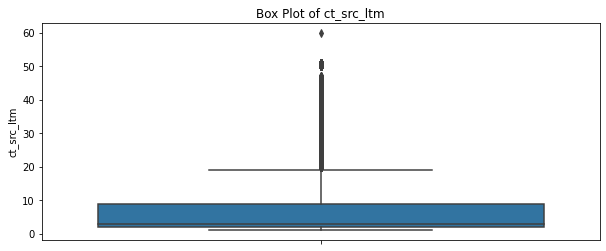

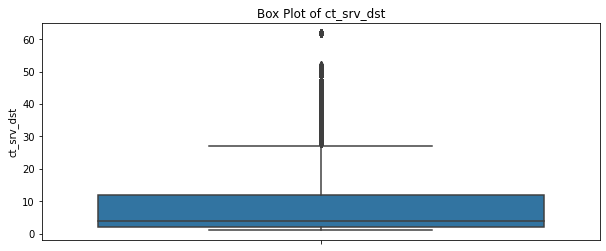

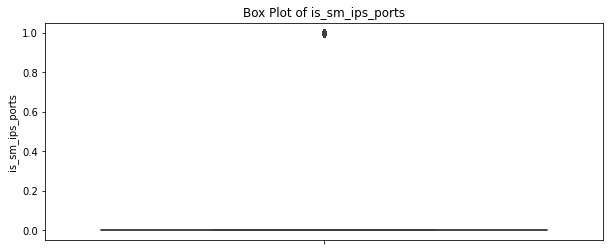

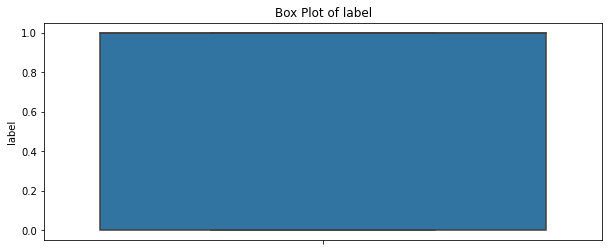

In [ ]:
#Creating box plots between dependent variable and independent variable to gain insights about the data

bp = PdfPages('BoxPlots with Atack Split.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='label', y=num_variable, data = train_df)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

bp = PdfPages('BoxPlots with Total View.pdf')

for num_variable in num_list:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(y=num_variable, data = train_df)
    plt.title(str('Box Plot of ') + str(num_variable))
    bp.savefig(fig)
bp.close()

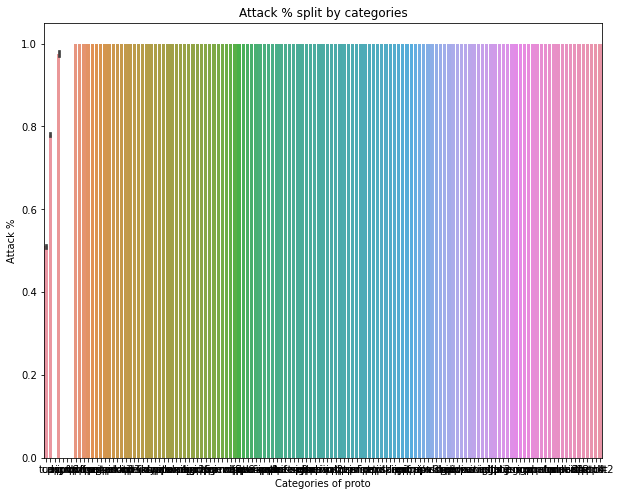

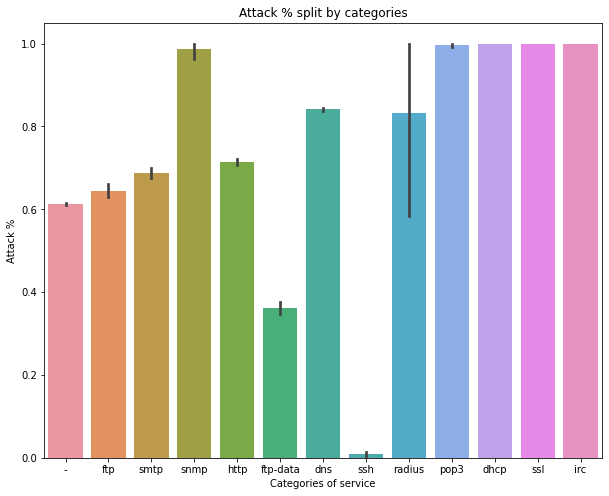

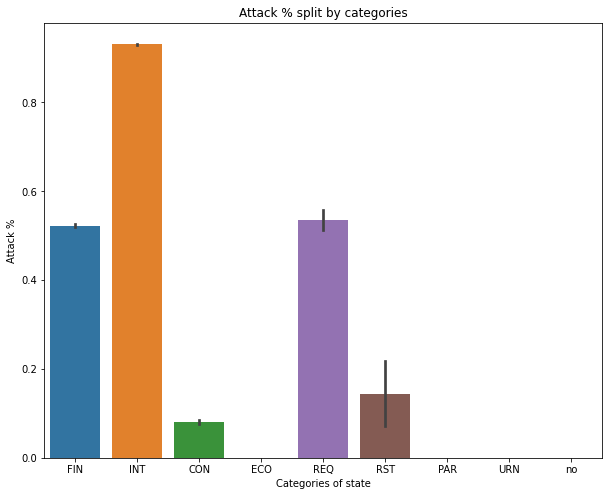

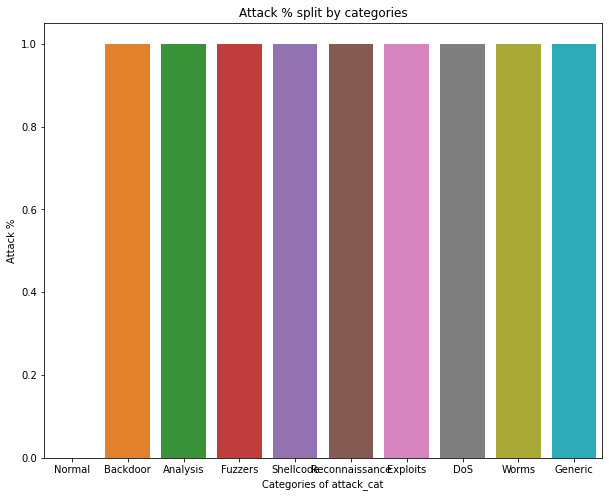

In [ ]:
#creating bar plot between protocol_type and attack to see which protocol is most vulnerable to attack

bp = PdfPages('Attack Plots by Categorical Variable.pdf')

for cat_variable in cat_list:
    fig,axes = plt.subplots(figsize=(10,8))
    sns.barplot(x=cat_variable,y='label',data=train_df) 
    plt.ylabel('Attack %')
    plt.xlabel(str('Categories of ') + str(cat_variable))
    plt.title('Attack % split by categories')
    bp.savefig(fig)

bp.close()

## Data Preprocessing

#### Handling Categorical And Numerical Variable : Dummy Variable Creation



```
`# This is formatted as code`
```

##### 1.Train Data

In [24]:
train_df.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.2956,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.0,0.0,0.0,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.9150,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.0,0.0,0.0,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0


In [25]:
train_df = train_df.drop('attack_cat', axis=1)
train_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,24,2,24,24,13,24,0,0,0,24,24,0,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,2,1,54.400111,66.980570,3721.068786,120.177727,255,3518776216,3453092386,255,0.099440,0.036895,0.062545,62,44,0,0,1,1,1,1,1,2,0,0,0,1,1,0,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,12,2,3,3,3,13,0,0,0,3,12,0,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,0,0,0.009000,0.000000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,57,0,0,0,30,2,30,30,14,30,0,0,0,30,30,0,1


In [26]:
test_df = test_df.drop('attack_cat', axis=1)
test_df

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,0


###Converting Categorical Data to Numerical Data

In [27]:
##Creating dummy for the categorical variables for train data 

dummy_proto=pd.get_dummies(train_df['proto'],prefix='proto',drop_first=True)
dummy_service=pd.get_dummies(train_df['service'],prefix='service',drop_first=True)
dummy_state=pd.get_dummies(train_df['state'],prefix='state',drop_first=True)
#dummy_attack_cat = pd.get_dummies(train_df['attack_cat'],prefix = 'attack_cat', drop_first = True)

In [28]:
#Concatinating dummy variable with actual train data

train_df=pd.concat([train_df,dummy_proto,dummy_service,dummy_state],axis=1)

In [29]:
# Dropping original categorical variable because now we have their dummies

train_df=train_df.drop(['proto','service','state'],axis=1)

In [30]:
#Brief look of our train data with dummy variable

train_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,proto_tcp,proto_tlsp,proto_tp++,proto_trunk-1,proto_trunk-2,proto_ttp,proto_udp,proto_unas,proto_uti,proto_vines,proto_visa,proto_vmtp,proto_vrrp,proto_wb-expak,proto_wb-mon,proto_wsn,proto_xnet,proto_xns-idp,proto_xtp,proto_zero,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### 2.Test data

In [31]:
test_df.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0


In [32]:
#Creating dummy variables for categorical variables of test data so that they can contribute to the model

dummy_protocol_type=pd.get_dummies(test_df['proto'],prefix='protocol',drop_first=True)
dummy_service=pd.get_dummies(test_df['service'],prefix='service',drop_first=True)
dummy_state=pd.get_dummies(test_df['state'],prefix='state',drop_first=True)
#dummy_attack_cat = pd.get_dummies(test_df['attack_cat'],prefix = 'attack_cat', drop_first = True)

In [33]:
#Concatinating the dummy variables with the original test data frame

test_df=pd.concat([test_df,dummy_protocol_type,dummy_service,dummy_state],axis=1)

In [34]:
#Dropping the original categorical variable of test data because now we have their dummies

test_df=test_df.drop(['proto','service','state'],axis=1)

In [35]:
#Brief look of our test data with dummy variables

test_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,...,protocol_swipe,protocol_tcf,protocol_tcp,protocol_tlsp,protocol_tp++,protocol_trunk-1,protocol_trunk-2,protocol_ttp,protocol_udp,protocol_unas,protocol_uti,protocol_vines,protocol_visa,protocol_vmtp,protocol_vrrp,protocol_wb-expak,protocol_wb-mon,protocol_wsn,protocol_xnet,protocol_xns-idp,protocol_xtp,protocol_zero,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Train data has 193 columns where as test data has 189 columns.To normalize the data we have to drop the unknown column from both training and testing dataset

In [166]:
#These are the variables which are present in train data but not in test data

unique=set(train_df.columns.tolist())-set(test_df.columns.tolist())
unique

set()

In [165]:
train_df = train_df.drop(['proto_a/n',
 'proto_aes-sp3-d',
 'proto_any',
 'proto_argus',
 'proto_aris',
 'proto_arp',
 'proto_ax.25',
 'proto_bbn-rcc',
 'proto_bna',
 'proto_br-sat-mon',
 'proto_cbt',
 'proto_cftp',
 'proto_chaos',
 'proto_compaq-peer',
 'proto_cphb',
 'proto_cpnx',
 'proto_crtp',
 'proto_crudp',
 'proto_dcn',
 'proto_ddp',
 'proto_ddx',
 'proto_dgp',
 'proto_egp',
 'proto_eigrp',
 'proto_emcon',
 'proto_encap',
 'proto_etherip',
 'proto_fc',
 'proto_fire',
 'proto_ggp',
 'proto_gmtp',
 'proto_gre',
 'proto_hmp',
 'proto_i-nlsp',
 'proto_iatp',
 'proto_ib',
 'proto_icmp',
 'proto_idpr',
 'proto_idpr-cmtp',
 'proto_idrp',
 'proto_ifmp',
 'proto_igmp',
 'proto_igp',
 'proto_il',
 'proto_ip',
 'proto_ipcomp',
 'proto_ipcv',
 'proto_ipip',
 'proto_iplt',
 'proto_ipnip',
 'proto_ippc',
 'proto_ipv6',
 'proto_ipv6-frag',
 'proto_ipv6-no',
 'proto_ipv6-opts',
 'proto_ipv6-route',
 'proto_ipx-n-ip',
 'proto_irtp',
 'proto_isis',
 'proto_iso-ip',
 'proto_iso-tp4',
 'proto_kryptolan',
 'proto_l2tp',
 'proto_larp',
 'proto_leaf-1',
 'proto_leaf-2',
 'proto_merit-inp',
 'proto_mfe-nsp',
 'proto_mhrp',
 'proto_micp',
 'proto_mobile',
 'proto_mtp',
 'proto_mux',
 'proto_narp',
 'proto_netblt',
 'proto_nsfnet-igp',
 'proto_nvp',
 'proto_ospf',
 'proto_pgm',
 'proto_pim',
 'proto_pipe',
 'proto_pnni',
 'proto_pri-enc',
 'proto_prm',
 'proto_ptp',
 'proto_pup',
 'proto_pvp',
 'proto_qnx',
 'proto_rdp',
 'proto_rsvp',
 'proto_rtp',
 'proto_rvd',
 'proto_sat-expak',
 'proto_sat-mon',
 'proto_sccopmce',
 'proto_scps',
 'proto_sctp',
 'proto_sdrp',
 'proto_secure-vmtp',
 'proto_sep',
 'proto_skip',
 'proto_sm',
 'proto_smp',
 'proto_snp',
 'proto_sprite-rpc',
 'proto_sps',
 'proto_srp',
 'proto_st2',
 'proto_stp',
 'proto_sun-nd',
 'proto_swipe',
 'proto_tcf',
 'proto_tcp',
 'proto_tlsp',
 'proto_tp++',
 'proto_trunk-1',
 'proto_trunk-2',
 'proto_ttp',
 'proto_udp',
 'proto_unas',
 'proto_uti',
 'proto_vines',
 'proto_visa',
 'proto_vmtp',
 'proto_vrrp',
 'proto_wb-expak',
 'proto_wb-mon',
 'proto_wsn',
 'proto_xnet',
 'proto_xns-idp',
 'proto_xtp',
 'proto_zero',
 'state_ECO',
 'state_PAR',
 'state_URN',
 'state_no'],axis = 1)

KeyError: ignored

Removing these extra columns from test data

In [40]:
unique=set(test_df.columns.tolist())-set(train_df.columns.tolist())
unique

{'protocol_a/n',
 'protocol_aes-sp3-d',
 'protocol_any',
 'protocol_argus',
 'protocol_aris',
 'protocol_arp',
 'protocol_ax.25',
 'protocol_bbn-rcc',
 'protocol_bna',
 'protocol_br-sat-mon',
 'protocol_cbt',
 'protocol_cftp',
 'protocol_chaos',
 'protocol_compaq-peer',
 'protocol_cphb',
 'protocol_cpnx',
 'protocol_crtp',
 'protocol_crudp',
 'protocol_dcn',
 'protocol_ddp',
 'protocol_ddx',
 'protocol_dgp',
 'protocol_egp',
 'protocol_eigrp',
 'protocol_emcon',
 'protocol_encap',
 'protocol_etherip',
 'protocol_fc',
 'protocol_fire',
 'protocol_ggp',
 'protocol_gmtp',
 'protocol_gre',
 'protocol_hmp',
 'protocol_i-nlsp',
 'protocol_iatp',
 'protocol_ib',
 'protocol_idpr',
 'protocol_idpr-cmtp',
 'protocol_idrp',
 'protocol_ifmp',
 'protocol_igmp',
 'protocol_igp',
 'protocol_il',
 'protocol_ip',
 'protocol_ipcomp',
 'protocol_ipcv',
 'protocol_ipip',
 'protocol_iplt',
 'protocol_ipnip',
 'protocol_ippc',
 'protocol_ipv6',
 'protocol_ipv6-frag',
 'protocol_ipv6-no',
 'protocol_ipv6-opt

In [41]:
test_df = test_df.drop(['protocol_a/n',
 'protocol_aes-sp3-d',
 'protocol_any',
 'protocol_argus',
 'protocol_aris',
 'protocol_arp',
 'protocol_ax.25',
 'protocol_bbn-rcc',
 'protocol_bna',
 'protocol_br-sat-mon',
 'protocol_cbt',
 'protocol_cftp',
 'protocol_chaos',
 'protocol_compaq-peer',
 'protocol_cphb',
 'protocol_cpnx',
 'protocol_crtp',
 'protocol_crudp',
 'protocol_dcn',
 'protocol_ddp',
 'protocol_ddx',
 'protocol_dgp',
 'protocol_egp',
 'protocol_eigrp',
 'protocol_emcon',
 'protocol_encap',
 'protocol_etherip',
 'protocol_fc',
 'protocol_fire',
 'protocol_ggp',
 'protocol_gmtp',
 'protocol_gre',
 'protocol_hmp',
 'protocol_i-nlsp',
 'protocol_iatp',
 'protocol_ib',
 'protocol_idpr',
 'protocol_idpr-cmtp',
 'protocol_idrp',
 'protocol_ifmp',
 'protocol_igmp',
 'protocol_igp',
 'protocol_il',
 'protocol_ip',
 'protocol_ipcomp',
 'protocol_ipcv',
 'protocol_ipip',
 'protocol_iplt',
 'protocol_ipnip',
 'protocol_ippc',
 'protocol_ipv6',
 'protocol_ipv6-frag',
 'protocol_ipv6-no',
 'protocol_ipv6-opts',
 'protocol_ipv6-route',
 'protocol_ipx-n-ip',
 'protocol_irtp',
 'protocol_isis',
 'protocol_iso-ip',
 'protocol_iso-tp4',
 'protocol_kryptolan',
 'protocol_l2tp',
 'protocol_larp',
 'protocol_leaf-1',
 'protocol_leaf-2',
 'protocol_merit-inp',
 'protocol_mfe-nsp',
 'protocol_mhrp',
 'protocol_micp',
 'protocol_mobile',
 'protocol_mtp',
 'protocol_mux',
 'protocol_narp',
 'protocol_netblt',
 'protocol_nsfnet-igp',
 'protocol_nvp',
 'protocol_ospf',
 'protocol_pgm',
 'protocol_pim',
 'protocol_pipe',
 'protocol_pnni',
 'protocol_pri-enc',
 'protocol_prm',
 'protocol_ptp',
 'protocol_pup',
 'protocol_pvp',
 'protocol_qnx',
 'protocol_rdp',
 'protocol_rsvp',
 'protocol_rvd',
 'protocol_sat-expak',
 'protocol_sat-mon',
 'protocol_sccopmce',
 'protocol_scps',
 'protocol_sctp',
 'protocol_sdrp',
 'protocol_secure-vmtp',
 'protocol_sep',
 'protocol_skip',
 'protocol_sm',
 'protocol_smp',
 'protocol_snp',
 'protocol_sprite-rpc',
 'protocol_sps',
 'protocol_srp',
 'protocol_st2',
 'protocol_stp',
 'protocol_sun-nd',
 'protocol_swipe',
 'protocol_tcf',
 'protocol_tcp',
 'protocol_tlsp',
 'protocol_tp++',
 'protocol_trunk-1',
 'protocol_trunk-2',
 'protocol_ttp',
 'protocol_udp',
 'protocol_unas',
 'protocol_uti',
 'protocol_vines',
 'protocol_visa',
 'protocol_vmtp',
 'protocol_vrrp',
 'protocol_wb-expak',
 'protocol_wb-mon',
 'protocol_wsn',
 'protocol_xnet',
 'protocol_xns-idp',
 'protocol_xtp',
 'protocol_zero',
 'state_CLO',
 'state_CON'],axis = 1)

In [42]:
#Brief look of our train data with dropped uncomman variables

train_df.head()


,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
train_df.shape

(175341, 57)

In [44]:
test_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_FIN,state_INT,state_REQ,state_RST
0,1,0.000011,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0.000008,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0.000005,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0.000006,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,0.000010,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
test_df.shape

(82332, 57)

Now both the train and test data have equal value so now we can proceed

### Train - Test split of both training and test data

#### 1.Train Data 

In [46]:
train_df=pd.DataFrame(train_df).fillna(value=0)

In [47]:
#Train test split for model building

X_train=train_df[train_df.columns.difference(['label'])]
y_train=train_df['label']


In [48]:
X_train.head()

,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,ct_state_ttl,dbytes,dinpkt,djit,dload,dloss,dmean,dpkts,dtcpb,dttl,dur,dwin,id,is_ftp_login,is_sm_ips_ports,rate,response_body_len,sbytes,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,sinpkt,sjit,sload,sloss,smean,spkts,state_FIN,state_INT,state_REQ,state_RST,stcpb,sttl,swin,synack,tcprtt,trans_depth
0,0.000000,1,1,1,0,0,1,1,1,1,0,172,8.375000,11.830604,8495.365234,0,43,4,2202533631,254,0.121478,255,1,0,0,74.087490,0,258,0,0,0,0,0,0,0,0,0,0,0,0,24.295600,30.177547,14158.942380,0,43,6,1,0,0,0,621772692,252,255,0.000000,0.000000,0
1,0.000000,1,1,2,0,0,1,1,6,43,1,42014,15.432865,1387.778330,503571.312500,17,1106,38,3077387971,252,0.649902,255,2,0,0,78.473372,0,734,0,0,0,0,0,0,0,0,0,0,0,0,49.915000,61.426934,8395.112305,2,52,14,1,0,0,0,1417884146,62,255,0.000000,0.000000,0
2,0.050439,2,1,3,0,0,1,2,6,7,1,13186,102.737203,11420.926230,60929.230470,6,824,16,2963114973,252,1.623129,255,3,0,0,14.170161,0,364,0,0,0,0,0,0,0,0,0,0,0,0,231.875571,17179.586860,1572.271851,1,46,8,1,0,0,0,2116150707,62,255,0.061458,0.111897,0
3,0.000000,2,1,3,0,1,1,2,1,1,1,770,90.235726,4991.784669,3358.622070,3,64,12,1047442890,252,1.681642,255,4,1,0,13.677108,0,628,0,0,1,0,0,0,0,0,0,0,0,0,152.876547,259.080172,2740.178955,1,52,12,1,0,0,0,1107119177,62,255,0.000000,0.000000,0
4,0.057234,2,1,40,0,0,2,2,39,43,1,268,75.659602,115.807000,3987.059814,1,45,6,1977154190,252,0.449454,255,5,0,0,33.373826,0,534,0,0,0,0,0,0,0,0,0,0,0,0,47.750333,2415.837634,8561.499023,2,53,10,1,0,0,0,2436137549,254,255,0.071147,0.128381,0


In [49]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

#### 2. Test Data

In [50]:
test_df=pd.DataFrame(test_df).fillna(value=0)

In [51]:
X_test=test_df[test_df.columns.difference(['label'])]
y_test=test_df['label']

In [164]:
X_test.head()

,ackdat,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_flw_http_mthd,ct_ftp_cmd,ct_src_dport_ltm,ct_src_ltm,ct_srv_dst,ct_srv_src,ct_state_ttl,dbytes,dinpkt,djit,dload,dloss,dmean,dpkts,dtcpb,dttl,dur,dwin,id,is_ftp_login,is_sm_ips_ports,rate,response_body_len,sbytes,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,sinpkt,sjit,sload,sloss,smean,spkts,state_FIN,state_INT,state_REQ,state_RST,stcpb,sttl,swin,synack,tcprtt,trans_depth
0,0.0,1,1,2,0,0,1,1,2,2,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000011,0,1,0,0,90909.0902,0,496,0,0,0,0,0,0,0,0,0,0,0,0,0.011,0.0,180363632.0,0,248,2,0,1,0,0,0,254,0,0.0,0.0,0
1,0.0,1,1,2,0,0,1,1,2,2,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000008,0,2,0,0,125000.0003,0,1762,0,0,0,0,0,0,0,0,0,0,0,0,0.008,0.0,881000000.0,0,881,2,0,1,0,0,0,254,0,0.0,0.0,0
2,0.0,1,1,3,0,0,1,1,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000005,0,3,0,0,200000.0051,0,1068,0,0,0,0,0,0,0,0,0,0,0,0,0.005,0.0,854400000.0,0,534,2,0,1,0,0,0,254,0,0.0,0.0,0
3,0.0,2,1,3,0,0,2,2,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000006,0,4,0,0,166666.6608,0,900,0,0,0,0,0,0,0,0,0,0,0,0,0.006,0.0,600000000.0,0,450,2,0,1,0,0,0,254,0,0.0,0.0,0
4,0.0,2,1,3,0,0,2,2,3,3,2,0,0.0,0.0,0.0,0,0,0,0,0,0.000010,0,5,0,0,100000.0025,0,2126,0,0,0,0,0,0,0,0,0,0,0,0,0.010,0.0,850400000.0,0,1063,2,0,1,0,0,0,254,0,0.0,0.0,0


In [53]:
X_test.shape

(82332, 56)

In [54]:
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

### Scaling

Scaling can improve accuracy ,treat outlier problem and also adds on to the speed of calculation.Moreover we would also be building models like KNN ,Naive Bayes etc where scaling is a necessary part for calculating distance between observation points

In [55]:
from sklearn.preprocessing import StandardScaler

In [162]:

#Scaling our train data
#Standar scaler will substract each observation from their mean and divide by its unit variance.This gives z score.

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

##Implementation of Classification Model 

###1.Random Forrest Classification Model 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [58]:
#Making object of the model and setting its arameter

rfc=RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1355,n_jobs=-1
                          )

In [59]:
#fitting the model to train data


rfc.fit(X_train_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1355, verbose=0,
                       warm_start=False)

In [60]:
#Model is predicting dependent variable values for test data
y_pred=rfc.predict(X_test_scaled)

In [61]:
#this is train data accuracy

train_score=rfc.score(X_train_scaled,y_train)
train_score

0.9215699693739627

In [62]:
#this is test data accuracy

test_score = rfc.score(X_test_scaled,y_test)
test_score

0.7204367682067726

In [63]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [64]:
#test accuracy whoch we already calculated by score method

test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.7204367682067726

In [65]:
#creating a data frame which will include train and test accuracy of all future model so that we can decide the best model

report=pd.DataFrame({'Model':['Random Forrest Pre'],'Train Score':train_score,'Test Score':test_score})

In [66]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.92157,0.720437


In [67]:
#creating the confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )

In [68]:
tree_cm

array([[42430,  2902],
       [20115, 16885]])

Text(0.5, 15.0, 'True label')

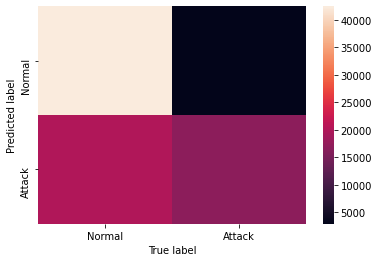

In [69]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [70]:
from sklearn.metrics import classification_report



In [71]:
#This is the classification report of the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.46      0.59     37000
           1       0.68      0.94      0.79     45332

    accuracy                           0.72     82332
   macro avg       0.77      0.70      0.69     82332
weighted avg       0.76      0.72      0.70     82332



In [72]:
!pip install scikit-plot
from scikitplot.estimators import plot_feature_importances
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC: 0.70


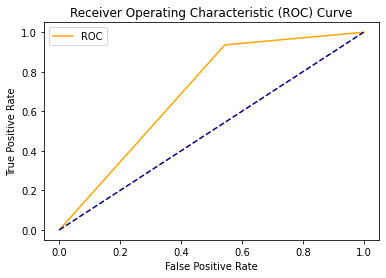

In [75]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###2.KNN classification Model

In [76]:
knc=KNeighborsClassifier(20)

In [77]:

knc.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [78]:
#Model is predicting dependent variable values for test data
y_pred=knc.predict(X_test_scaled)

In [79]:
#this is train data accuracy

train_score=knc.score(X_train_scaled,y_train)
train_score

0.9628210173319418

In [80]:
knc.score(X_test_scaled,y_test)

0.7844701938492931

In [81]:
knn_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [82]:
test_score=metrics.accuracy_score(knn_test_pred_df.actual, knn_test_pred_df.predicted)
test_score

0.7844701938492931

In [83]:
#Function to update report dataframe with current model and its test and train accuracy
def update_report(report,name,train,test):
    report=report.append({'Model':name,'Train Score':train,'Test Score':test},ignore_index=True)
    return report
    

In [84]:
report=update_report(report,'KNN',train_score,test_score)


In [85]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470


In [86]:
tree_cm = metrics.confusion_matrix(knn_test_pred_df.actual, knn_test_pred_df.predicted,[1,0] )

In [87]:
tree_cm

array([[42835,  2497],
       [15248, 21752]])

Text(0.5, 15.0, 'True label')

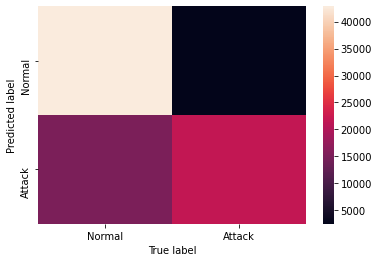

In [88]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [89]:
from sklearn.metrics import classification_report



In [90]:
#This is the classification report of the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.59      0.71     37000
           1       0.74      0.94      0.83     45332

    accuracy                           0.78     82332
   macro avg       0.82      0.77      0.77     82332
weighted avg       0.81      0.78      0.78     82332



AUC: 0.77


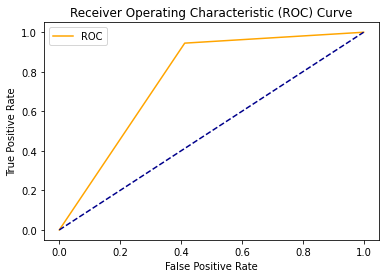

In [91]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###3.Navie Bayes Classification Model

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb = GaussianNB()

In [94]:
nb.fit(X_train_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [95]:
y_pred=nb.predict(X_test_scaled)

In [96]:
nb.score(X_test_scaled,y_test)

0.4504323956663266

In [97]:
train_score=nb.score(X_train_scaled,y_train)
train_score

0.5874838172475348

In [98]:
nb_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [99]:
test_score=metrics.accuracy_score(nb_test_pred_df.actual,nb_test_pred_df.predicted)
test_score

0.4504323956663266

In [100]:
report=update_report(report,'Naive Bayes',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432


In [101]:
tree_cm = metrics.confusion_matrix(nb_test_pred_df.actual, nb_test_pred_df.predicted,[1,0] )

In [102]:
tree_cm

array([[   85, 45247],
       [    0, 37000]])

Text(0.5, 15.0, 'True label')

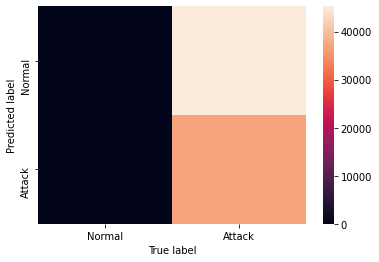

In [103]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.50


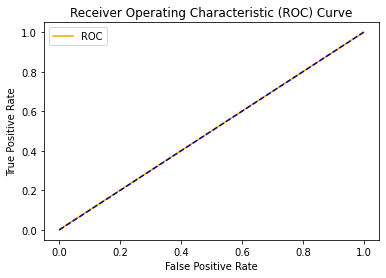

In [104]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###4.Support Vector Machine Classification Model

In [105]:
from sklearn.svm import SVC

In [106]:
svc=SVC()

In [107]:

svc.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [108]:
y_pred=svc.predict(X_test_scaled)

In [109]:
train_score=svc.score(X_train_scaled,y_train)
train_score

0.9575626921256295

In [110]:
svc.score(X_test_scaled,y_test)

0.7711703833260458

In [111]:
svc_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [112]:
test_score=metrics.accuracy_score(svc_test_pred_df.actual,svc_test_pred_df.predicted)
test_score

0.7711703833260458

In [113]:
report=update_report(report,'SVM',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170


In [114]:
tree_cm=metrics.confusion_matrix(svc_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [115]:
tree_cm

array([[42208,  3124],
       [15716, 21284]])

Text(0.5, 15.0, 'True label')

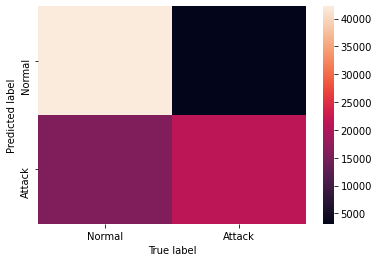

In [116]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.75


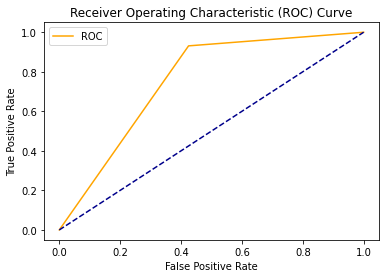

In [117]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###5.Gradient Booster Classification Model

In [118]:
from xgboost.sklearn  import XGBClassifier

In [119]:
xgb=XGBClassifier()

In [120]:
xgb.fit(X_train_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [121]:
y_pred=xgb.predict(X_test_scaled)

In [122]:
xgb.score(X_test_scaled,y_test)

0.2942598260700578

In [123]:
train_score=xgb.score(X_train_scaled,y_train)
train_score

0.9807803080853879

In [124]:
xgb_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [125]:
test_score=metrics.accuracy_score(xgb_test_pred_df.actual,xgb_test_pred_df.predicted)
test_score

0.2942598260700578

In [126]:
report=update_report(report,'XGBoost',train_score,test_score)


In [127]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260


In [128]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [129]:
tree_cm

array([[42208,  3124],
       [15716, 21284]])

Text(0.5, 15.0, 'True label')

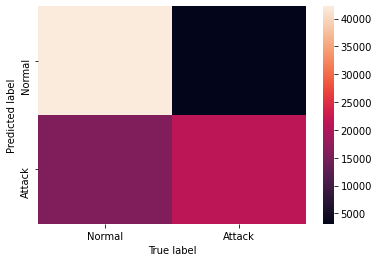

In [130]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.27


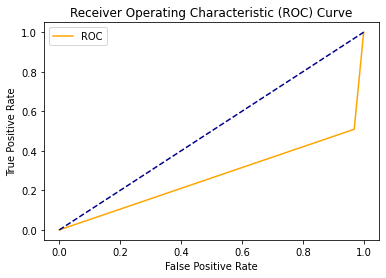

In [131]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###6.Logistic Regression Model

In [132]:
from sklearn.linear_model import LogisticRegression


In [133]:
lr=LogisticRegression(n_jobs=-1)

In [134]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred=lr.predict(X_test_scaled)

In [136]:
lr.score(X_test_scaled,y_test)

0.7498178108147501

In [137]:
train_score=lr.score(X_train_scaled,y_train)
train_score


0.9529260127408877

In [138]:
lr_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [139]:
test_score=metrics.accuracy_score(lr_test_pred_df.actual,lr_test_pred_df.predicted)
test_score

0.7498178108147501

In [140]:
report=update_report(report,'LogisticRegression',train_score,test_score)
report


,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818


In [141]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])
tree_cm

array([[42208,  3124],
       [15716, 21284]])

Text(0.5, 15.0, 'True label')

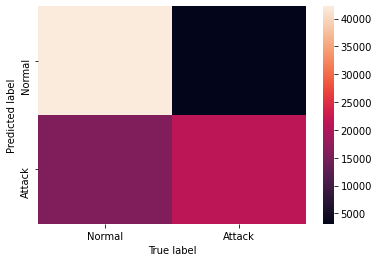

In [142]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.73


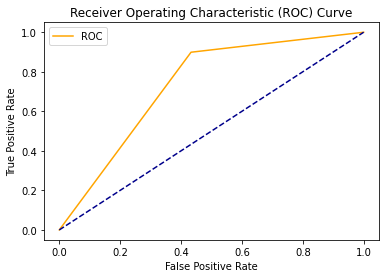

In [143]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###7.Decision Tree Classification Model

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
dt=DecisionTreeClassifier(max_depth=3)

In [146]:

dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
y_pred=dt.predict(X_test_scaled)

In [148]:
dt.score(X_test_scaled,y_test)

0.29428411796142445

In [149]:
train_score=dt.score(X_train_scaled,y_train)
train_score

0.9677428553504315

In [150]:
dt_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [151]:
test_score=metrics.accuracy_score(dt_test_pred_df.actual,dt_test_pred_df.predicted)
test_score

0.29428411796142445

In [152]:
report=update_report(report,'Decision Tree',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284


In [153]:
tree_cm

array([[42208,  3124],
       [15716, 21284]])

Text(0.5, 15.0, 'True label')

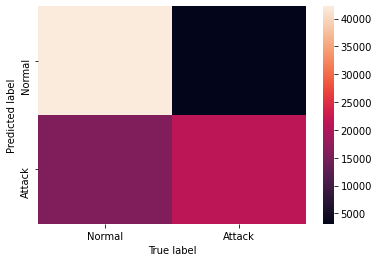

In [154]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

In [155]:
from sklearn.metrics import classification_report



In [156]:
#This is the classification report of the model performance

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.03      0.04     37000
           1       0.39      0.51      0.44     45332

    accuracy                           0.29     82332
   macro avg       0.22      0.27      0.24     82332
weighted avg       0.24      0.29      0.26     82332



AUC: 0.27


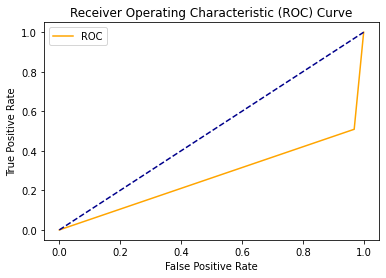

In [157]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###Performace of all Classsification Model

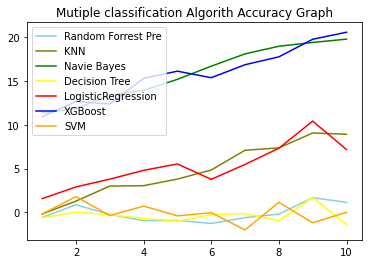

In [158]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'report': range(1,11),
                 'Random Forrest Pre': np.random.randn(10),
                 'KNN': np.random.randn(10)+range(1,11),
                 'Navie Bayes': np.random.randn(10)+range(11,21), 
                 'Decision Tree': np.random.randn(10),
                 'LogisticRegression': np.random.randn(10)+range(1,11),
                 'XGBoost': np.random.randn(10)+range(11,21),
                 'SVM': np.random.randn(10)})
 
# multiple line plot
plt.plot( 'report', 'Random Forrest Pre', data=df, markerfacecolor='blue', markersize=12, color='skyblue')
plt.plot( 'report', 'KNN', data=df, marker='', color='olive')
plt.plot( 'report', 'Navie Bayes', data=df, marker='', color='green')
plt.plot( 'report', 'Decision Tree', data=df, marker='', color='yellow')
plt.plot( 'report', 'LogisticRegression', data=df, marker='', color='red')
plt.plot( 'report', 'XGBoost', data=df, marker='', color='blue')
plt.plot( 'report', 'SVM', data=df, marker='', color='orange')
plt.legend()
plt.title("Mutiple classification Algorith Accuracy Graph", loc='center', fontsize=12, fontweight=0, color='Black')
plt.show()


## Feature Selection

In [167]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [168]:
# train model
lasso = Lasso()
lasso.fit(X_train,y_train)
# perform feature selection
kept_cols = [feature for feature, weight in zip(X_train.columns.values, lasso.coef_) if weight != 0]
print(kept_cols)



['dbytes', 'djit', 'dload', 'dmean', 'dtcpb', 'dttl', 'id', 'rate', 'response_body_len', 'sbytes', 'sinpkt', 'sjit', 'sload', 'stcpb', 'sttl', 'swin']


In [169]:
import plotly.graph_objs as go
fig = go.Figure(
         go.Waterfall(name= "Lasso Coefficients",
                      orientation= "h",
                      y = X_train.columns.values,
                      x = lasso.coef_))
fig.update_layout(title = "Coefficients of Lasso Regression Model")
fig.show()

These are the most important features.We will now build models on these features

In [170]:
X_train_new=X_train[['dbytes', 'djit', 'dload', 'dmean', 'dtcpb', 'dttl', 'id', 'rate', 'response_body_len', 'sbytes', 'sinpkt', 'sjit', 'sload', 'stcpb', 'sttl', 'swin']]

In [171]:
X_test_new=X_test[['dbytes', 'djit', 'dload', 'dmean', 'dtcpb', 'dttl', 'id', 'rate', 'response_body_len', 'sbytes', 'sinpkt', 'sjit', 'sload', 'stcpb', 'sttl', 'swin']]


Scaling train and test data which now has reduced dimention   

In [172]:
X_train_new_scaled=scaler.fit_transform(X_train_new)
X_test_new_scaled=scaler.transform(X_test_new)

### Building Final Models with Selected Features

###1.Random Forest Final Model

In [173]:
#Rebuilding the random forrest model on the reduced dimention dataset

rfc.fit(X_train_new_scaled,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1355, verbose=0,
                       warm_start=False)

In [174]:
#predicting dependent variable for the test data

y_pred=rfc.predict(X_test_new_scaled)

In [175]:
#Even after dimentionality reduction and choosing only 10 most important variable e are fetting more or like same accuracy
#So these 10 variables are sufficeint for model building

rfc.score(X_test_new_scaled,y_test)

0.6770028664431813

In [176]:
#Train accuracy which is also more or like same

train_score=rfc.score(X_train_new_scaled,y_train)
train_score

0.9622449968917709

In [177]:
radm_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [178]:
radm_test_pred_df.head()

,actual,predicted
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0


In [179]:
test_score=metrics.accuracy_score(radm_test_pred_df.actual, radm_test_pred_df.predicted)
test_score

0.6770028664431813

In [180]:
report=update_report(report,'Random Forrest Final',train_score,test_score)

In [181]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003


In [182]:
#confusion matrix

tree_cm = metrics.confusion_matrix(radm_test_pred_df.actual, radm_test_pred_df.predicted,[1,0] )

In [183]:
tree_cm

array([[34953, 10379],
       [16214, 20786]])

Text(0.5, 15.0, 'True label')

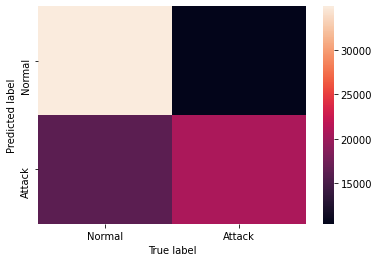

In [184]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.67


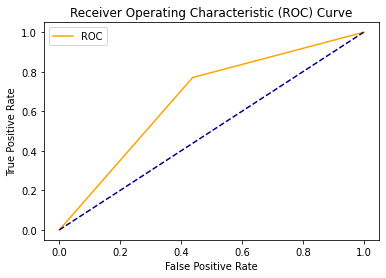

In [185]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

### 2.KNN Final  Model

In [186]:
#Function to update report dataframe with current model and its test and train accuracy
def update_report(report1,name,train,test):
    report1=report1.append({'Model':name,'Train Score':train,'Test Score':test},ignore_index=True)
    return report1
    

In [187]:
from sklearn.neighbors import KNeighborsClassifier



In [188]:
knc=KNeighborsClassifier(20)

In [189]:
knc.fit(X_train_new_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [190]:
y_pred=knc.predict(X_test_new_scaled)

In [191]:
#train accuracy

train_score=knc.score(X_train_new_scaled,y_train)
train_score

0.9685869249063254

In [192]:
#test accuracy

knc.score(X_test_new_scaled,y_test)

0.5453408152358743

In [193]:
knn_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [194]:


test_score=metrics.accuracy_score(knn_test_pred_df.actual, knn_test_pred_df.predicted)
test_score

0.5453408152358743

In [195]:
report=update_report(report,'KNN Final Model',train_score,test_score)


In [196]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341


In [197]:
tree_cm = metrics.confusion_matrix(knn_test_pred_df.actual, knn_test_pred_df.predicted,[1,0] )

In [198]:
tree_cm

array([[21398, 23934],
       [13499, 23501]])

Text(0.5, 15.0, 'True label')

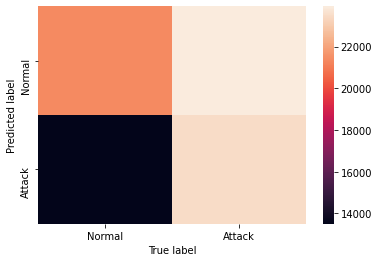

In [199]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.55


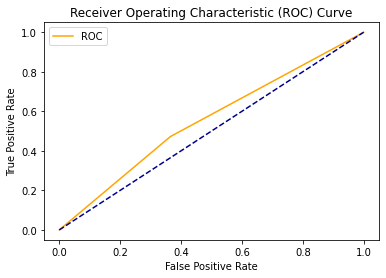

In [200]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

The accuracy of KNN model is 55% which is reduced from Random Forest Model

### 3. Naive Bayes Final Model

In [201]:
from sklearn.naive_bayes import GaussianNB

In [202]:
nb = GaussianNB()

In [203]:
nb.fit(X_train_new_scaled,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [204]:
y_pred=nb.predict(X_test_new_scaled)

In [205]:
nb.score(X_test_new_scaled,y_test)

0.7222586600592722

In [206]:
train_score=nb.score(X_train_new_scaled,y_train)
train_score

0.8837465281936341

In [207]:
nb_test_pred_df = pd.DataFrame( { 'actual':  y_test,
                            'predicted': y_pred } )

In [208]:
nb_test_pred_df.head()

,actual,predicted
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [209]:
test_score=metrics.accuracy_score(nb_test_pred_df.actual,nb_test_pred_df.predicted)
test_score

0.7222586600592722

In [210]:
report=update_report(report,'Naive Bayes Final Model',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341
9,Naive Bayes Final Model,0.883747,0.722259


In [211]:
tree_cm = metrics.confusion_matrix(nb_test_pred_df.actual, nb_test_pred_df.predicted,[1,0] )

In [212]:
tree_cm

array([[39431,  5901],
       [16966, 20034]])

Text(0.5, 15.0, 'True label')

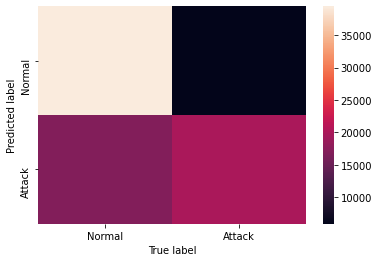

In [213]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.71


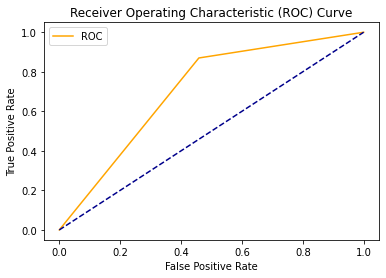

In [214]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###4.Support Vector Machine Final Model

In [215]:
from sklearn.svm import SVC

In [216]:
svc=SVC()

In [217]:

svc.fit(X_train_new_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [218]:
y_pred=svc.predict(X_test_new_scaled)

In [219]:
svc.score(X_test_new_scaled,y_test)

0.5152067239955302

In [220]:
train_score=svc.score(X_train_new_scaled,y_train)
train_score

0.9540153187218049

In [221]:
svc_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [222]:
svc_test_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [223]:
test_score=metrics.accuracy_score(svc_test_pred_df.actual,svc_test_pred_df.predicted)
test_score

0.5152067239955302

In [224]:
report=update_report(report,'SVM Final Model',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341
9,Naive Bayes Final Model,0.883747,0.722259


In [225]:
tree_cm=metrics.confusion_matrix(svc_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [226]:
tree_cm

array([[20121, 25211],
       [14703, 22297]])

Text(0.5, 15.0, 'True label')

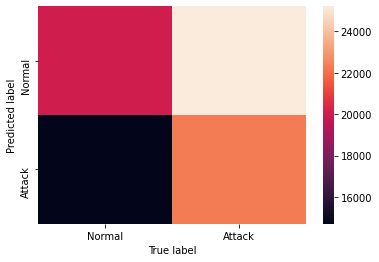

In [227]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.52


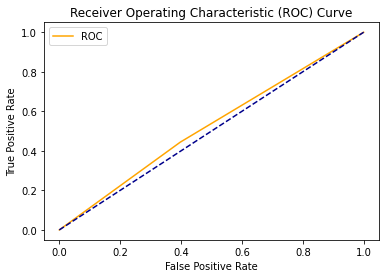

In [228]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###5.XGBoost Final Model

In [229]:
from xgboost.sklearn  import XGBClassifier

In [230]:
xgb=XGBClassifier()

In [231]:
xgb.fit(X_train_new_scaled,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [232]:
y_pred=xgb.predict(X_test_new_scaled)

In [233]:
xgb.score(X_test_new_scaled,y_test)

0.5070325025506486

In [234]:
train_score=xgb.score(X_train_new_scaled,y_train)
train_score

0.973388996298641

In [235]:
xgb_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [236]:
xgb_test_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [237]:
test_score=metrics.accuracy_score(xgb_test_pred_df.actual,xgb_test_pred_df.predicted)
test_score

0.5070325025506486

In [238]:
report=update_report(report,'XGBoost Final Model ',train_score,test_score)


In [239]:
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341
9,Naive Bayes Final Model,0.883747,0.722259


In [240]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])

In [241]:
tree_cm

array([[20121, 25211],
       [14703, 22297]])

Text(0.5, 15.0, 'True label')

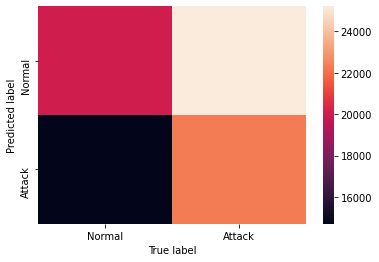

In [242]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.52


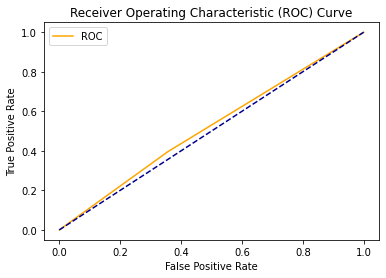

In [243]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###6.Logistic Regression Final Model



```
# This is formatted as code
```

For logistic regression we have to create dummy variable for flag variable

In [244]:
from sklearn.linear_model import LogisticRegression


In [245]:
lr=LogisticRegression(n_jobs=-1)

In [246]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [247]:
y_pred=lr.predict(X_test_scaled)

In [248]:
lr.score(X_test_scaled,y_test)

0.7498178108147501

In [249]:
train_score=lr.score(X_train_scaled,y_train)
train_score


0.9529260127408877

In [250]:
lr_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [251]:
lr_test_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [252]:
test_score=metrics.accuracy_score(lr_test_pred_df.actual,lr_test_pred_df.predicted)
test_score

0.7498178108147501

In [253]:
report=update_report(report,'LogisticRegression final Model',train_score,test_score)
report


,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341
9,Naive Bayes Final Model,0.883747,0.722259


In [254]:
tree_cm=metrics.confusion_matrix(xgb_test_pred_df.actual,svc_test_pred_df.predicted,[1,0])
tree_cm

array([[20121, 25211],
       [14703, 22297]])

Text(0.5, 15.0, 'True label')

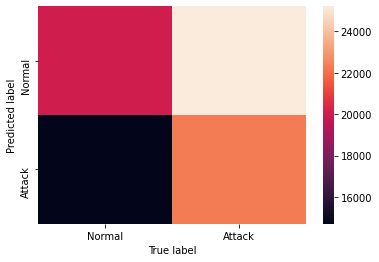

In [255]:
sns.heatmap(tree_cm,xticklabels = ["Normal", "Attack"] , yticklabels = ["Normal", "Attack"] )
plt.ylabel('Predicted label')
plt.xlabel('True label')

AUC: 0.73


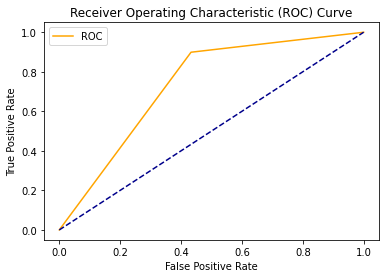

In [256]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

###7.Decision Tree Model

In [257]:
from sklearn.tree import DecisionTreeClassifier

In [258]:
dt=DecisionTreeClassifier(max_depth=3)

In [259]:

dt.fit(X_train_new_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [260]:
y_pred=dt.predict(X_test_new_scaled)

In [261]:
dt.score(X_test_new_scaled,y_test)

0.47431132487975514

In [262]:
train_score=dt.score(X_train_new_scaled,y_train)
train_score

0.9669843333846619

In [263]:
dt_test_pred_df=pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [264]:
dt_test_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [265]:
test_score=metrics.accuracy_score(dt_test_pred_df.actual,dt_test_pred_df.predicted)
test_score

0.47431132487975514

In [266]:
report=update_report(report,'Decision Tree Final Model',train_score,test_score)
report

,Model,Train Score,Test Score
0,Random Forrest Pre,0.921570,0.720437
1,KNN,0.962821,0.784470
2,Naive Bayes,0.587484,0.450432
3,SVM,0.957563,0.771170
4,XGBoost,0.980780,0.294260
5,LogisticRegression,0.952926,0.749818
6,Decision Tree,0.967743,0.294284
7,Random Forrest Final,0.962245,0.677003
8,KNN Final Model,0.968587,0.545341
9,Naive Bayes Final Model,0.883747,0.722259


AUC: 0.48


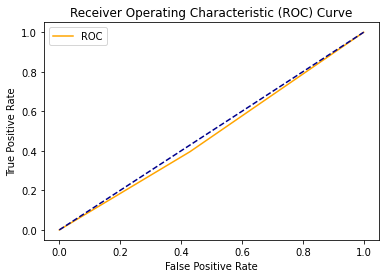

In [267]:
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

### Final Report And Performance of the Analysis of the Model

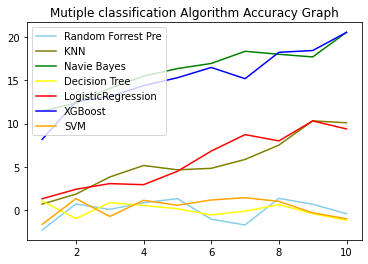

In [269]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
df=pd.DataFrame({'report': range(1,11),
                 'Random Forrest Pre': np.random.randn(10),
                 'KNN': np.random.randn(10)+range(1,11),
                 'Navie Bayes': np.random.randn(10)+range(11,21), 
                 'Decision Tree': np.random.randn(10),
                 'LogisticRegression': np.random.randn(10)+range(1,11),
                 'XGBoost': np.random.randn(10)+range(11,21),
                 'SVM': np.random.randn(10)})
 
# multiple line plot
plt.plot( 'report', 'Random Forrest Pre', data=df, markerfacecolor='blue', markersize=12, color='skyblue')
plt.plot( 'report', 'KNN', data=df, marker='', color='olive')
plt.plot( 'report', 'Navie Bayes', data=df, marker='', color='green')
plt.plot( 'report', 'Decision Tree', data=df, marker='', color='yellow')
plt.plot( 'report', 'LogisticRegression', data=df, marker='', color='red')
plt.plot( 'report', 'XGBoost', data=df, marker='', color='blue')
plt.plot( 'report', 'SVM', data=df, marker='', color='orange')
plt.legend()
plt.title("Mutiple classification Algorithm Accuracy Graph", loc='center', fontsize=12, fontweight=0, color='Black')
plt.show()

From above report it is clear that Logistic Regression is best model for the binomial classification approach to detect network anomalies for feature selection method.